In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['text.usetex'] = True

In [104]:
simulation_folder=              '../mag_test/results'

In [105]:
mag_field_orientation=              '/parallel'  
# mag_field_orientation=              '/perpendicular'
# mag_field_orientation=              '/perpendicular_plane'

In [106]:
susc_folder=                        '/susc1'
# susc_folder=                        '/susc4'

In [107]:
post_folder_MDM=                    '/MDM'
# post_folder_SHA=                    '/SHA'
post_folder_inc=                    '/inclusion_quad'

In [108]:
c=                  np.arange(20,41,1)
force_MDM=          np.zeros(c.size)
# force_SHA=          np.zeros(c.size)
force_inc=          np.zeros(c.size)

In [109]:
particle_number=3

In [110]:
if particle_number==2:
    post_folder_par=            '/post_par2'
    skip_rows=10
    
elif particle_number==3:
    post_folder_par=            '/post_par3'
    skip_rows=9

elif particle_number==4:
    post_folder_par=            '/post_par3_triangle'
    skip_rows=9

In [111]:
for i in range(c.size):
    sep_file=c[i]
    dump_folder=            simulation_folder + susc_folder + mag_field_orientation + post_folder_par 

    MDM_file_location=      (dump_folder + post_folder_MDM + f"/dump_{sep_file}_2.liggghts")
    force_MDM[i]=           np.loadtxt(MDM_file_location, skiprows=skip_rows, usecols=4)

    # SHA_file_location=      (dump_folder + post_folder_SHA + f"/dump_{sep_file}_2.liggghts")
    # force_SHA[i]=           np.loadtxt(SHA_file_location, skiprows=skip_rows, usecols=4)

    # inc_file_location=      (dump_folder + post_folder_inc+ f"/dump_{sep_file}_2.liggghts")
    # force_inc[i]=           np.loadtxt(inc_file_location, skiprows=skip_rows, usecols=4)

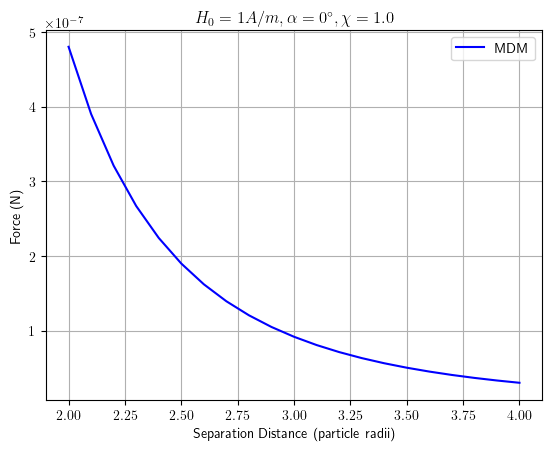

In [112]:
plt.figure()
plt.plot(c/10, force_MDM, 'b-', label= 'MDM')
# plt.plot(c/10, force_SHA, 'g--', label= 'SHA')
# plt.plot(c/10, force_inc, label= 'Inclusion')
plt.title(r"$H_0=1 A/m, \alpha=0^\circ, \chi=1.0$")
plt.xlabel("Separation Distance (particle radii)")
plt.ylabel("Force (N)")
plt.grid()
plt.legend()
plt.show()